In [1]:
import hashlib
import matplotlib.pyplot as plt 
import numpy as np
import random
import pandas as pd
from math import factorial

In [2]:
class hard_coded:
  def __init__(self):
    self.money = 0
    self.round = 0

  def play_round(self, did_i_win, amount):
    self.money += 500
    self.round += 1
    if did_i_win == 0:
      self.money -= amount
    prob = [500, 992, 1170, 1181, 1499, 1276, 1290, 1401, 2166, 5000][self.round - 1]
    if prob > self.money:
      return self.money
    else:
      return prob    

In [3]:
class above_average:
  def __init__(self):
    self.round = 0
    self.player_money = [0] * 4
  def play_round(self, winner, winning_bid):
    self.round += 1
    self.player_money = [x+500 for x in self.player_money]
    if winner != -1:
      self.player_money[winner] -= winning_bid
    if self.round == 10:
      return self.player_money[0]
    bid = sum(self.player_money[1:]) / 3 + 1
    if bid > self.player_money[0]:
      return self.player_money[0]
    return min(self.player_money[0], bid)

In [4]:
class forgetful_bot:
  def play_round(self, winner, amt):
    return 500

In [5]:
class one_upper:
    def __init__(self): 
        self.money = 0
        self.round = 0
    def play_round(self, winner, win_amount):
        self.money += 500
        if winner == 0: self.money -= win_amount
        self.round += 1
        bid = win_amount + 1
        if self.money < bid or self.round == 10:
            bid = self.money
        return bid

In [6]:
class patient_bot:
    def __init__(self):
        self.round = 0
        self.money = 0
    def rand(self, seed, max):
        return (394587485 - self.money*self.round*seed) % (max + 1)
    def play_round(self, winner, amount):
        self.round += 1
        self.money += 500
        if winner == 0:
            self.money -= amount
        if self.round < 6:
            return 0
        else:
            bid = 980 + self.rand(amount, 35)
            if self.money < bid or self.round == 10:
                bid = self.money
            return bid

In [7]:
class copycat_or_sad:
  def __init__(self):
    self.money = 0
    self.round = -1
  def play_round(self, winner, win_amount):
    # Default actions:
    #  Collect 500 dollars
    self.money += 500
    #  If it was the winner: subtract the win_amount from his money
    if winner == 0:
      self.money -= win_amount
    #  One round further
    self.round += 1
    
    # If it's the final round: bid all-in
    if self.round == 9:
      return self.money
    # Else-if there was no previous winner, or it doesn't have enough money left: bid 1
    if win_amount < 1 or self.money < win_amount:
      return 1
    # Else: bid the exact same as the previous winner
    return win_amount

In [8]:
class eenie_meanie_more:
    def __init__(self):
        self.money = [0] * 4
        self.rounds = 11
        self.total_spent = 0

    def play_round(self, winner, winning_bid):
        self.money = [x+500 for x in self.money]
        self.rounds -= 1
        if winner != -1:
            self.money[winner] -= winning_bid
            self.total_spent += winning_bid
        bid = 500
        if self.rounds > 0 and self.total_spent < 20000:
            bid = int((20000 - self.total_spent)/self.rounds/4)+440
        return min(bid, max(self.money[1:])+1, self.money[0])

In [9]:
class AverageMine:
    nplayers = 4
    maxrounds = 10
    def __init__(self):
        self.money = [0] * self.nplayers
        self.wins = [0] * self.nplayers
        self.round = 0
        self.average = 0
    def play_round(self, winner, win_amt):
        self.round += 1
        for i in range(self.nplayers):
            if i == winner:
                self.average = (self.average * (self.round - 2) + (win_amt / self.money[i])) / (self.round - 1)
                self.money[i] -= win_amt
                self.wins[i] += 1
            self.money[i] += 500
        if self.round == 1:
            return int(0.990 * self.money[0])
        elif self.round < self.maxrounds:
            if self.money[0] > self.money[1] + 1 and self.money[0] > self.money[2] + 1 and self.money[0] > self.money[3] + 1:
                return max(self.money[1],self.money[2],self.money[3]) + 1
            bid = int(self.average * self.money[0]) + 85
            return min(self.money[0],bid)
        else:
            bid = self.money[0]
            return bid

In [10]:
class minus_one:
    def __init__(self):
        self.money = 0
    def play_round(self, winner, amount):
        self.money += 500
        if winner == 0:
            self.money -= amount
        return self.money - 1

In [11]:
class heurist:
    def __init__(self):
        self.money = 0
        self.round = -1
        self.net_worth = [0] * 4
    def play_round(self, winner, bid):
        self.round += 1
        self.money += 500
        if winner == 0: self.money -= bid
        if winner != -1: self.net_worth[winner] -= bid
        self.net_worth = [x+500 for x in self.net_worth]
        max_bid = [498,1000,1223,1391,1250,1921,2511,1666,1600,5000][self.round]
        if self.money > max_bid:
            return 1 + min(max_bid,max(self.net_worth[1:3]))
        else:
            return self.money

In [12]:
class blacklist_mod:
  def __init__(self):
    self.round = 0
    self.player_money = [0] * 4
    self.blacklist = {0, 499}
  def play_round(self, winner, winning_bid):
    self.round += 1
    self.player_money = [x+500 for x in self.player_money]
    if winner != -1:
      self.player_money[winner] -= winning_bid
      self.blacklist.add(winning_bid % 500)
      self.blacklist |= {x % 500 for x in self.player_money[1:]}
    tentative_bid = self.player_money[0]
    autowin = max(self.player_money[1:])+1
    if tentative_bid < autowin:
      while tentative_bid and (tentative_bid % 500) in self.blacklist:
        tentative_bid = tentative_bid - 1
    else:
      tentative_bid = autowin
    self.blacklist.add(tentative_bid % 500)
    return tentative_bid

In [13]:
class patient_distributer_bot:
    def __init__(self):
        #starting money = 0
        self.dollar = 0
        #randomizer
        self.random = myrand(1)
        #round counter
        self.round = 0
    def play_round(self, winner, win_amount):
        #add 500$
        self.dollar += 500
        #go to next round
        self.round += 1
        #if bot wins, subtract the winning amount
        if winner == 0:
            self.dollar -= win_amount
        #if it is the first half of rounds, distribute the money across
        if self.round < 5:
            return (((10 - self.round) - 1) * 500 + self.dollar) / 10 - self.round
        #if its the second half of rounds, bid ~1000$
        #if you dont have enough budget or its the final round, go all in
        else:
            bid = 980 + self.random.randint(win_amount, 35)
            if self.dollar < bid or self.round == 10:
                bid = self.dollar
            return bid

In [14]:
class myrand:
    def __init__(self, seed): self.val = seed
    def randint(self, a, b):
        self.val = (self.val * 6364136223846793005 + 1) % (1 << 64)
        return (self.val >> 32) % (b - a + 1) + a


In [15]:
class detail_bot:

    def __init__(self):
        self.round = 0
        self.dollar = [0] * 4


    def play_round(self, winner, win_amt):
        for i in range(4):
            if i == winner:
                self.dollar[i] -= win_amt
            self.dollar[i]+=500
        self.round+=1
        if(self.round==1 or self.round==10):
            return self.dollar[0]
        elif self.dollar[0] > self.dollar[1] + 1 and self.dollar[0] > self.dollar[2] + 1 and self.dollar[0] > self.dollar[
            3] + 1:
            return max(self.dollar[1], self.dollar[2], self.dollar[3]) + 1
        else:
            return randrange(self.dollar[0])

In [16]:
class Graylist:
  def __init__(self):
    self.round = 0
    self.player_money = [0] * 4
    self.ratios = {1}
    self.diffs = {0}
  def play_round(self, winner, winning_bid):
    self.round += 1
    if winner != -1:
      if winner >0 and winning_bid>0:
        self.ratios.add(self.player_money[winner]/winning_bid)
        self.diffs.add(self.player_money[winner]-winning_bid)
      self.player_money[winner] -= winning_bid
    self.player_money = [x+500 for x in self.player_money]
    tentative_bid = min(self.player_money[0],max(self.player_money[1:])+1, winning_bid+169, sum(self.player_money[1:])//3+169)
    while tentative_bid and (tentative_bid in (round(m*r) for m in self.player_money[1:] for r in self.ratios)) or (tentative_bid in (m-d for m in self.player_money[1:] for d in self.diffs)):
      tentative_bid = tentative_bid - 1
    return tentative_bid

In [17]:
class meanie:
    def __init__(self):
        self.money = [0] * 4
        self.rounds = 11
        self.total_spent = 0

    def play_round(self,winner,winning_bid):
        self.money = [x+500 for x in self.money]
        self.rounds -= 1
        if winner != -1:
            self.money[winner] -= winning_bid
            self.total_spent += winning_bid
        bid = 500
        if self.rounds > 0 and self.total_spent < 20000:
            bid = int((20000 - self.total_spent)/self.rounds/4)+1
        return min(bid,max(self.money[1:])+1,self.money[0])


In [18]:
class BeatTheWinner:
    nplayers = 4
    maxrounds = 10
    def __init__(self):
        self.money = [0] * self.nplayers
        self.wins = [0] * self.nplayers
        self.round = 0

    def play_round(self, winner, win_amt):
        self.round += 1
        for i in range(self.nplayers):
            self.money[i] += 500
            if i == winner:
                self.money[i] -= win_amt
                self.wins[i] += 1
        mymoney = self.money[0]
        for w,m in sorted(zip(self.wins, self.money),reverse=True):
            if mymoney > m:
                return m+1
        #if we get here we can't afford our default strategy, so
        return int(mymoney/10)

# Our BOTS

In [19]:
class ninty_nine:
    
    def __init__(self):
        self.dollar = 0
        self.round=0

    
    def play_round(self,winner,win_amount):
        
        self.dollar += 500
        if winner == 0:
            self.dollar -= win_amount
        self.round+= 1
        if self.round==10:
            return self.dollar
        else:
            return self.dollar * 0.99


In [20]:
class above_average_percentage_bot:
    def __init__(self):
        #starting money = 0
        self.dollar = 0 
        #randomizer
        self.random = myrand(1)
        #round counter
        self.round = 0
        #total winnings counter
        self.total = 0
    def play_round(self, winner, win_amount):
        #add 500$
        self.dollar += 500
        #go to next round
        self.round += 1
        #add the winnig amount in the total
        self.total += win_amount
        #if bot wins, subtract the winnig amount
        if winner == 0: 
            self.dollar -= win_amount
        #return a random amount between the average winnig amount of your total budget 
        #based on the average win percentage and the budget left
        try:
            bid = self.random.randint(((self.total/self.round)/win_amount)*self.dollar,self.dollar)
        except ZeroDivisionError:
            return self.dollar
        
        if bid > self.dollar or self.round == 10:
          return self.dollar
        else:
          return bid

In [21]:
class billonios2:
    def __init__(self):
        self.money = 0
        self.round = -1
        self.adder = 0

    def play_round(self, winner, winning_bid):
        self.money += 500            
        if winner == 0:
            self.adder = 0
            self.money -= winning_bid
        self.round += 1
        if self.round == 0:
            return 0
        self.adder += 11
        bid = winning_bid + self.adder
        if self.money < bid or self.round==10:
            bid = self.money
        return bid

# The plot function

In [22]:
def plot_it(bids, pl):
    fig = plt.figure()
    X = np.arange(10)
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X - 0.2, bids[0], color = 'r', width = 0.2, label= bot_list[pl[0]].__name__)
    ax.bar(X + 0, bids[1], color = 'g', width = 0.2, label= bot_list[pl[1]].__name__)
    ax.bar(X + 0.2, bids[2], color = 'b', width = 0.2, label= bot_list[pl[2]].__name__)
    ax.bar(X + 0.4, bids[3], color = 'm', width = 0.2, label= bot_list[pl[3]].__name__)
    # X and Y labels
    ax.set_ylabel('Bids')
    ax.set_xlabel('Rounds')
    ax.set_title('Bids by 4 bots')
    
    x_label = [str(i) for i in range(1,11)]
    ax.set_xticks(X)
    ax.set_xticklabels(x_label)
    ax.legend()

# The console (modified)

ninty_nine           Score: 13     Total: 16926
above_average_percentage_bot Score: 12     Total: 14725
billonios2           Score: 11     Total: 14528
BeatTheWinner        Score: 10     Total: 11887
patient_bot          Score: 4      Total: 20000


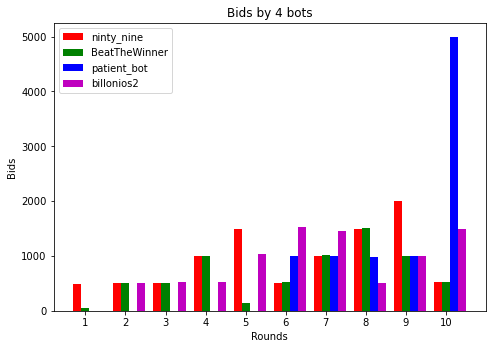

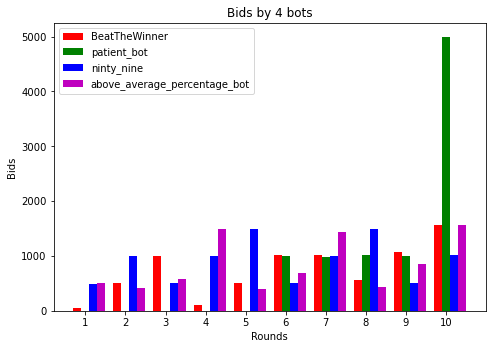

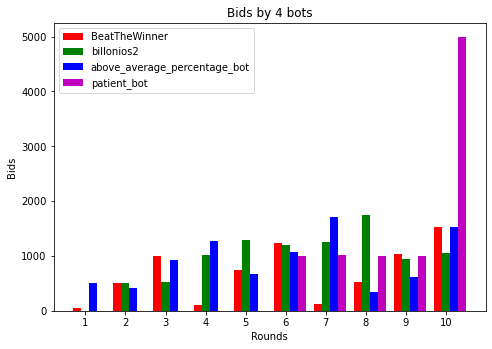

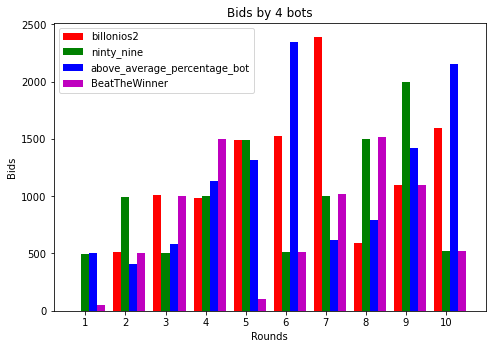

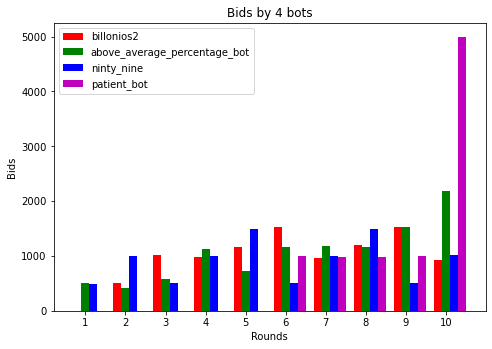

In [23]:
# from some_bots import some_bots

bot_list = [#copycat_or_sad,
            BeatTheWinner,
#             hard_coded,
#             above_average,
#             forgetful_bot,
            patient_bot,
#             eenie_meanie_more,
#             AverageMine,
#             minus_one,
#             heurist,
#             blacklist_mod,
            ninty_nine,
            billonios2,
            above_average_percentage_bot,
#             Graylist,
#             meanie
           ]


def decide_order(ls):
    hash = int(hashlib.sha1(str(ls).encode()).hexdigest(), 16) % 24
    nls = []
    for i in range(4, 0, -1):
        nls.append(ls[hash % i])
        del ls[hash % i]
        hash //= i
    return nls

N = len(bot_list)
score = [0] * N
total = [0] * N
counter_games = 0
# Total games n! / (n - r)! 
# where n the number of bots and r equals 4 because in every games 4 bots are participating
total_games = factorial(N) / (factorial(4)*factorial(N - 4))

#That's an array 
rounds_plot = [[[0 for i in range(4)] for j in range(10)] for k in range(int(total_games))]

# Convert to DataFrame in order to handle it easier
datas = pd.DataFrame(rounds_plot)

def auction(ls):
    # Variables for plot purpose
    bids_plot = [[0 for i in range(10)] for j in range(4)]
    
    global score, total, counter_games
    pl = decide_order(sorted(ls))
    bots = [bot_list[i]() for i in pl]
    dollar = [0] * 4
    prev_win, prev_bid = -1, -1
    for rounds in range(10):
        bids = []
        #give the each bot 500$
        for i in range(4): 
            dollar[i] += 500
        for i in range(4):
            tmp_win = prev_win
            #if a bot won the last round, set the temporary win variable to 0
            if prev_win == i: tmp_win = 0
            #if some other bot won and played before this one,
            #increase the temporary win variable by one
            elif prev_win != -1 and prev_win < i: tmp_win += 1
            #get the bid from the bot playing
            bid = int(bots[i].play_round(tmp_win, prev_bid))
            if bid < 0 or bid > dollar[i]: raise ValueError(pl[i])
            # Append it to the bid_plot in order to plot it
            bids_plot[i][rounds] = bid
            bids.append((bid, i))
            
            # Adding the variables to the DataFrame
            datas.iloc[counter_games][rounds][i] = bid

            
        bids.sort(reverse = True)
        winner = 0
        if bids[0][0] == bids[1][0]:
            if bids[2][0] == bids[3][0]: winner = -1
            elif bids[1][0] == bids[2][0]: winner = 3
            else: winner = 2
        if winner == -1:
            prev_win, prev_bid = -1, -1
        else:
            prev_bid, prev_win = bids[winner]
            score[pl[prev_win]] += 1
            total[pl[prev_win]] += prev_bid
            dollar[prev_win] -= prev_bid
    
    counter_games +=1
    plot_it(bids_plot, pl)
    

for a in range(N - 3):
    for b in range(a + 1, N - 2):
        for c in range(b + 1, N - 1):
            for d in range(c + 1, N): auction([a, b, c, d])

res = sorted(map(list, zip(score, total, bot_list)), key = lambda k: (-k[0], k[1]))

class TIE_REMOVED: pass

for i in range(N - 1):
    if (res[i][0], res[i][1]) == (res[i + 1][0], res[i + 1][1]):
        res[i][2] = res[i + 1][2] = TIE_REMOVED

for sc, t, tp in res:
    
    print('%-20s Score: %-6d Total: %d' % (tp.__name__, sc, t))


In [24]:
datas

,0,1,2,3,4,5,6,7,8,9
0,"[495, 50, 0, 0]","[499, 506, 0, 506]","[500, 507, 0, 521]","[995, 1007, 0, 532]","[1490, 149, 0, 1029]","[510, 517, 997, 1523]","[1005, 1017, 993, 1456]","[1500, 1517, 989, 500]","[1995, 1001, 997, 1000]","[521, 522, 5000, 1500]"
1,"[50, 0, 495, 500]","[501, 0, 990, 412]","[1001, 0, 504, 582]","[99, 0, 999, 1489]","[512, 0, 1494, 390]","[1012, 997, 510, 682]","[1017, 989, 1005, 1444]","[568, 1013, 1500, 429]","[1068, 997, 510, 857]","[1568, 5000, 1016, 1567]"
2,"[50, 0, 500, 0]","[501, 511, 412, 0]","[1001, 522, 934, 0]","[99, 1023, 1265, 0]","[736, 1298, 669, 0]","[1236, 1191, 1077, 997]","[126, 1258, 1709, 1009]","[527, 1742, 341, 993]","[1027, 949, 609, 997]","[1527, 1049, 1526, 5000]"
3,"[0, 495, 500, 50]","[511, 990, 412, 501]","[1012, 504, 582, 1001]","[988, 999, 1132, 1501]","[1488, 1494, 1317, 99]","[1527, 510, 2349, 517]","[2393, 1005, 614, 1017]","[595, 1500, 796, 1517]","[1095, 1995, 1424, 1096]","[1595, 521, 2151, 522]"
4,"[0, 500, 495, 0]","[511, 412, 990, 0]","[1012, 582, 504, 0]","[988, 1132, 999, 0]","[1154, 723, 1494, 0]","[1527, 1161, 510, 997]","[961, 1186, 1005, 985]","[1208, 1164, 1500, 989]","[1533, 1532, 510, 997]","[928, 2182, 1016, 5000]"


# The Script

In [25]:
# -------------------------   SCRIPT ----------- 

average_block = []
values = 2

for j in range(10):
    sums = 0
    
    #iterate through the games
    for i in range(datas.shape[0]):
        #take the n largest values
        temp = (pd.DataFrame(datas.iloc[i,j])).nlargest(values, 0).sum()
        #find the mean 
        sums += temp/values
        
    #find the mean bid from all games in round j
    sums /= datas.shape[0]
    average_block.append(sums)
    print("Round {} we have an average of {:.2f}$ bid".format(j, sums[0]))

Round 0 we have an average of 408.00$ bid
Round 1 we have an average of 651.70$ bid
Round 2 we have an average of 815.30$ bid
Round 3 we have an average of 1154.20$ bid
Round 4 we have an average of 1218.90$ bid
Round 5 we have an average of 1352.00$ bid
Round 6 we have an average of 1350.20$ bid
Round 7 we have an average of 1399.00$ bid
Round 8 we have an average of 1356.90$ bid
Round 9 we have an average of 3052.30$ bid


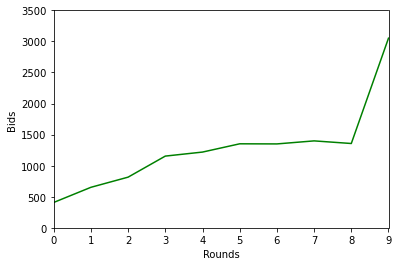

In [26]:
plt.ylim(0, 3500)
plt.xlim(0,9, 1)
plt.xlabel('Rounds')
plt.ylabel('Bids')
plt.plot(average_block, 'g')
plt.show()